            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: readiness_score
No. Observations: 146     Method:             REML           
No. Groups:       5       Scale:              58.5303        
Min. group size:  26      Log-Likelihood:     -505.0650      
Max. group size:  33      Converged:          Yes            
Mean group size:  29.2                                       
--------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
--------------------------------------------------------------
Intercept      81.776     1.592  51.375  0.000  78.656  84.896
C(phase)[T.4]  -2.060     1.364  -1.511  0.131  -4.734   0.613
Group Var       9.642     1.095                               

    readiness_score  predicted_readiness_score
0              86.0                  81.776171
1              87.0                  81.776171
2              82.0                  81.776171
3          

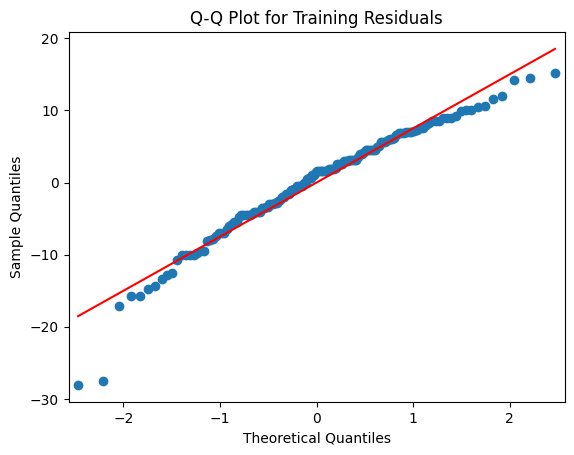

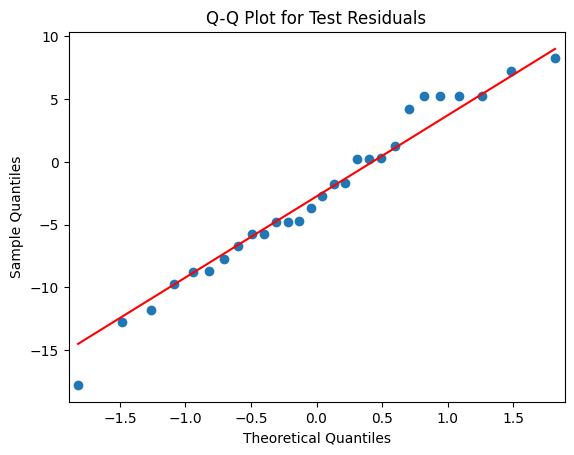

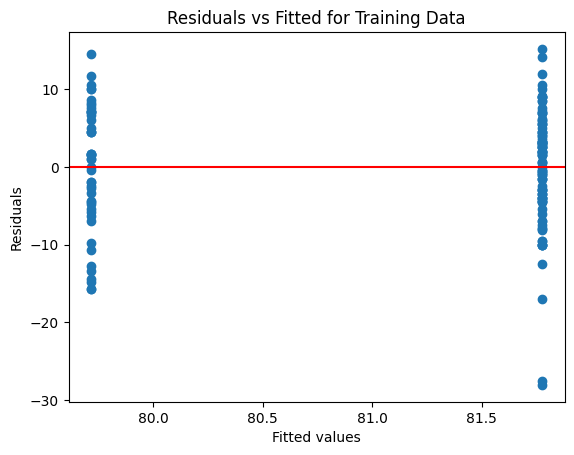

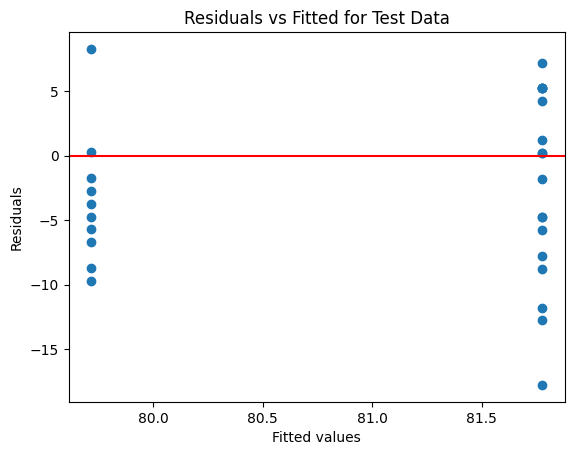

In [5]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load training data from CSV
train_file_path = '/Data_TrainOption2.csv'
train_df = pd.read_csv(train_file_path)

# Fit a linear mixed-effects model
# The fixed effect is the menstrual phase, and the random effect is the cycle.
model = smf.mixedlm("readiness_score ~ C(phase)", train_df, groups=train_df["cycle"])
result = model.fit(method='cg', maxiter=1000)

print(result.summary())

# Load test data from CSV
test_file_path = '/users/nada/desktop/Oura_Readiness/test.csv'
test_df = pd.read_csv(test_file_path)

# Make predictions on the test data
test_df['predicted_readiness_score'] = result.predict(test_df)

# Display the test data with predictions
print(test_df[['readiness_score', 'predicted_readiness_score']])

# Predict on training and test sets
predicted_train = result.predict(train_df)
predicted_test = result.predict(test_df)

# Add predicted values to the respective DataFrames
train_df['predicted_readiness_score'] = predicted_train
test_df['predicted_readiness_score'] = predicted_test




# Remove rows with NaN values in the true or predicted labels for each dataset
train_df = train_df.dropna(subset=['readiness_score', 'predicted_readiness_score'])
test_df = test_df.dropna(subset=['readiness_score', 'predicted_readiness_score'])




#Now, compute the metrics
mse_train = mean_squared_error(train_df['readiness_score'], train_df['predicted_readiness_score'])
mse_test = mean_squared_error(test_df['readiness_score'], test_df['predicted_readiness_score'])

mae_train = mean_absolute_error(train_df['readiness_score'], train_df['predicted_readiness_score'])
mae_test = mean_absolute_error(test_df['readiness_score'], test_df['predicted_readiness_score'])

# Print results
print("\nTraining MSE:", mse_train)
print("Test MSE:", mse_test)

print("\nTraining MAE:", mae_train)
print("Test MAE:", mae_test)

# Q-Q plot for training results
sm.qqplot(result.resid, line='s')
plt.title('Q-Q Plot for Training Residuals')
plt.show()


# Q-Q plot for test results
test_residuals = test_df['readiness_score'] - test_df['predicted_readiness_score']
sm.qqplot(test_residuals, line='s')
plt.title('Q-Q Plot for Test Residuals')
plt.show()



# Residuals vs Fitted plot for training results
plt.scatter(train_df['predicted_readiness_score'], result.resid)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Fitted for Training Data')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Residuals vs Fitted plot for test results
residuals_test = test_df['readiness_score'] - test_df['predicted_readiness_score']
plt.scatter(test_df['predicted_readiness_score'], residuals_test)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Fitted for Test Data')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()


            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: readiness_score
No. Observations: 146     Method:             REML           
No. Groups:       5       Scale:              58.4020        
Min. group size:  26      Log-Likelihood:     -502.6302      
Max. group size:  33      Converged:          Yes            
Mean group size:  29.2                                       
-------------------------------------------------------------
                Coef.  Std.Err.   z    P>|z|  [0.025   0.975]
-------------------------------------------------------------
Intercept      349.254  253.464  1.378 0.168 -147.526 846.034
C(phase)[T.4]   -0.401    2.080 -0.193 0.847   -4.478   3.677
temperature     -2.760    2.615 -1.055 0.291   -7.885   2.366
Group Var       10.226    1.153                              

    readiness_score  predicted_readiness_score
0              86.0                  81.692179
1              87.0                  80.588375
2 

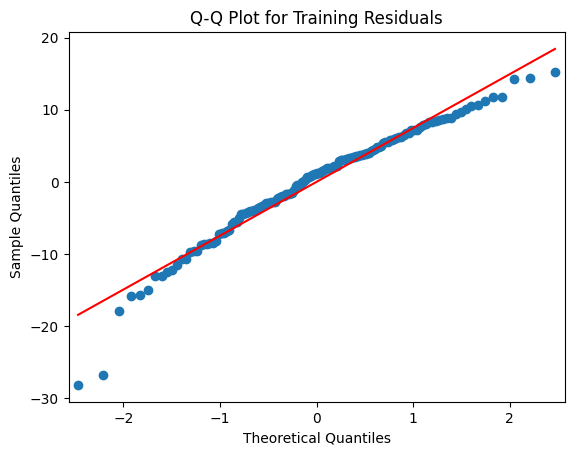

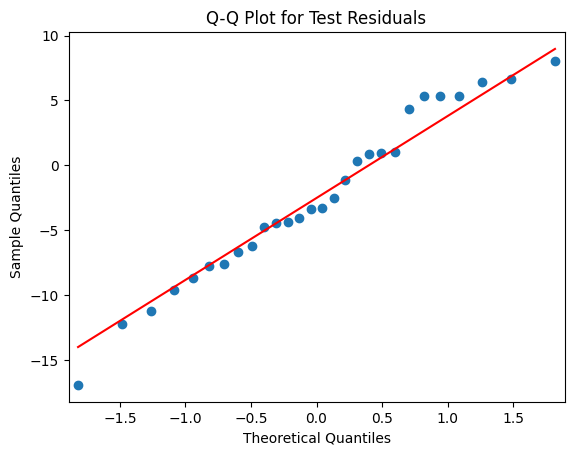

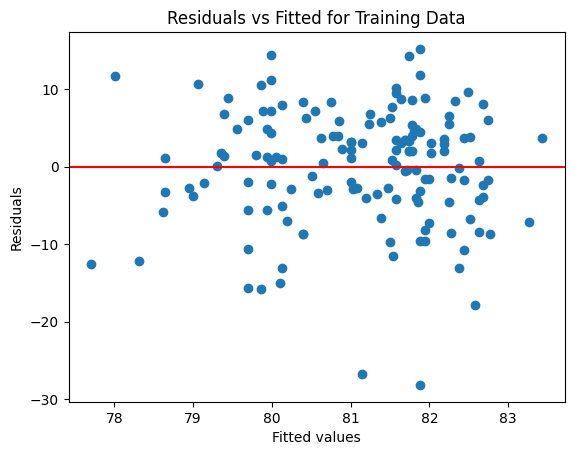

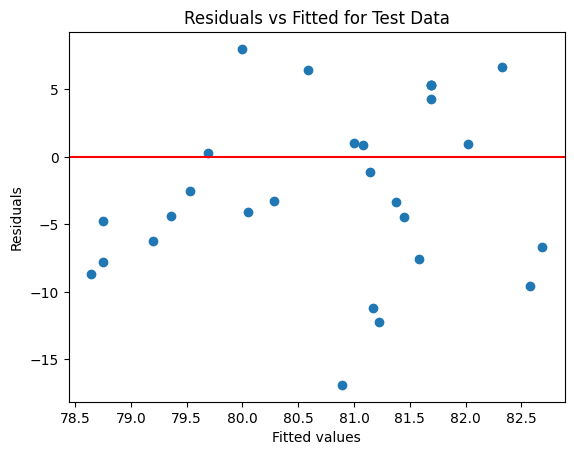

In [6]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load training data from CSV
train_file_path = '/Data_TrainOption2.csv'
train_df = pd.read_csv(train_file_path)

# Fit a linear mixed-effects model
# The fixed effect is the menstrual phase, and the random effect is the cycle.
model = smf.mixedlm("readiness_score ~ C(phase)+ temperature", train_df, groups=train_df["cycle"])
result = model.fit(method='cg', maxiter=1000)

print(result.summary())

# Load test data from CSV
test_file_path = '/users/nada/desktop/Oura_Readiness/test.csv'
test_df = pd.read_csv(test_file_path)

# Make predictions on the test data
test_df['predicted_readiness_score'] = result.predict(test_df)

# Display the test data with predictions
print(test_df[['readiness_score', 'predicted_readiness_score']])

# Predict on training and test sets
predicted_train = result.predict(train_df)
predicted_test = result.predict(test_df)

# Add predicted values to the respective DataFrames
train_df['predicted_readiness_score'] = predicted_train
test_df['predicted_readiness_score'] = predicted_test




# Remove rows with NaN values in the true or predicted labels for each dataset
train_df = train_df.dropna(subset=['readiness_score', 'predicted_readiness_score'])
test_df = test_df.dropna(subset=['readiness_score', 'predicted_readiness_score'])




#Now, compute the metrics
mse_train = mean_squared_error(train_df['readiness_score'], train_df['predicted_readiness_score'])
mse_test = mean_squared_error(test_df['readiness_score'], test_df['predicted_readiness_score'])

mae_train = mean_absolute_error(train_df['readiness_score'], train_df['predicted_readiness_score'])
mae_test = mean_absolute_error(test_df['readiness_score'], test_df['predicted_readiness_score'])

# Print results
print("\nTraining MSE:", mse_train)
print("Test MSE:", mse_test)

print("\nTraining MAE:", mae_train)
print("Test MAE:", mae_test)

# Q-Q plot for training results
sm.qqplot(result.resid, line='s')
plt.title('Q-Q Plot for Training Residuals')
plt.show()


# Q-Q plot for test results
test_residuals = test_df['readiness_score'] - test_df['predicted_readiness_score']
sm.qqplot(test_residuals, line='s')
plt.title('Q-Q Plot for Test Residuals')
plt.show()



# Residuals vs Fitted plot for training results
plt.scatter(train_df['predicted_readiness_score'], result.resid)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Fitted for Training Data')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Residuals vs Fitted plot for test results
residuals_test = test_df['readiness_score'] - test_df['predicted_readiness_score']
plt.scatter(test_df['predicted_readiness_score'], residuals_test)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Fitted for Test Data')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()


                  Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     readiness_score
No. Observations:     146         Method:                 REML           
No. Groups:           5           Scale:                  58.3852        
Min. group size:      26          Log-Likelihood:         -499.5818      
Max. group size:      33          Converged:              Yes            
Mean group size:      29.2                                               
-------------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z|  [0.025   0.975] 
-------------------------------------------------------------------------
Intercept                 160.197  321.551  0.498 0.618 -470.031  790.425
C(phase)[T.4]             495.485  519.099  0.955 0.340 -521.931 1512.901
temperature                -0.809    3.317 -0.244 0.807   -7.311    5.693
C(phase)[T.4]:temperature  -5.096    5.335 -0.955 0.339 

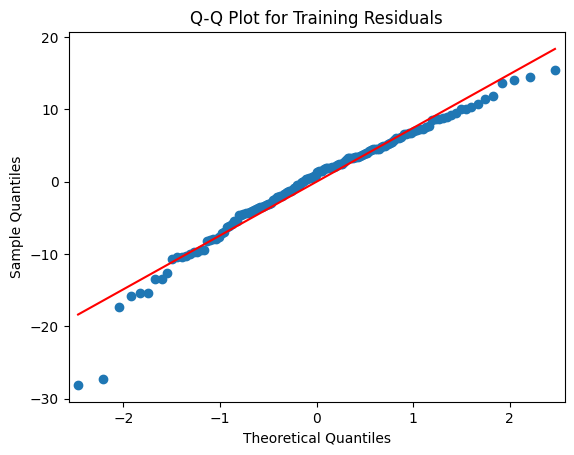

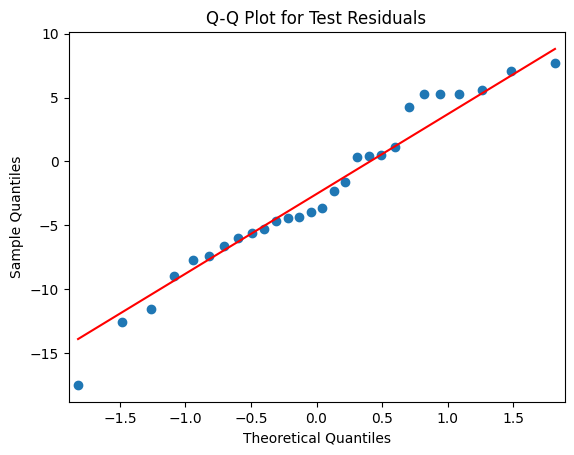

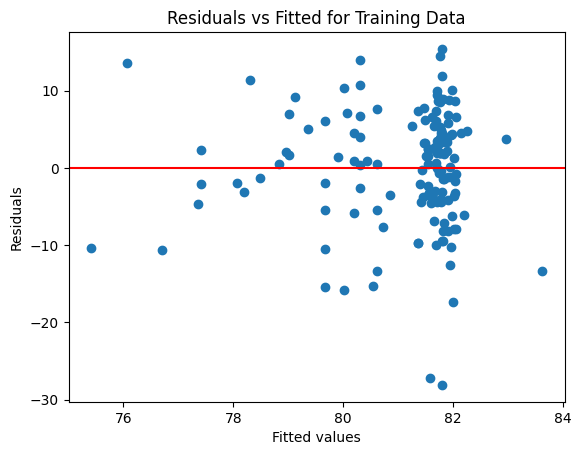

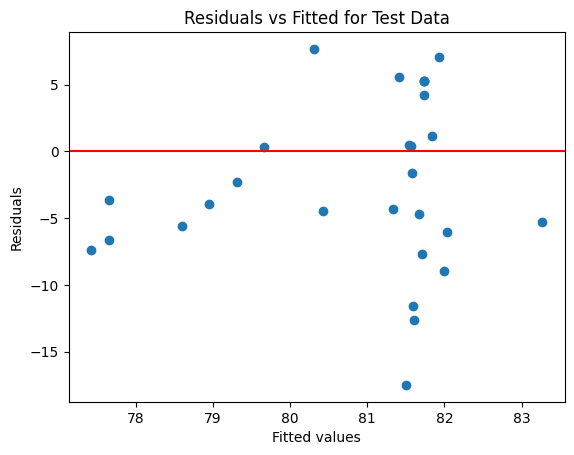

In [7]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load training data from CSV
train_file_path ='/Data_TrainOption2.csv'
train_df = pd.read_csv(train_file_path)

# Fit a linear mixed-effects model
# The fixed effect is the menstrual phase, and the random effect is the cycle.
model = smf.mixedlm("readiness_score ~ C(phase)* temperature", train_df, groups=train_df["cycle"])
result = model.fit(method='cg', maxiter=1000)

print(result.summary())

# Load test data from CSV
test_file_path = '/users/nada/desktop/Oura_Readiness/test.csv'
test_df = pd.read_csv(test_file_path)

# Make predictions on the test data
test_df['predicted_readiness_score'] = result.predict(test_df)

# Display the test data with predictions
print(test_df[['readiness_score', 'predicted_readiness_score']])

# Predict on training and test sets
predicted_train = result.predict(train_df)
predicted_test = result.predict(test_df)

# Add predicted values to the respective DataFrames
train_df['predicted_readiness_score'] = predicted_train
test_df['predicted_readiness_score'] = predicted_test




# Remove rows with NaN values in the true or predicted labels for each dataset
train_df = train_df.dropna(subset=['readiness_score', 'predicted_readiness_score'])
test_df = test_df.dropna(subset=['readiness_score', 'predicted_readiness_score'])




#Now, compute the metrics
mse_train = mean_squared_error(train_df['readiness_score'], train_df['predicted_readiness_score'])
mse_test = mean_squared_error(test_df['readiness_score'], test_df['predicted_readiness_score'])

mae_train = mean_absolute_error(train_df['readiness_score'], train_df['predicted_readiness_score'])
mae_test = mean_absolute_error(test_df['readiness_score'], test_df['predicted_readiness_score'])

# Print results
print("\nTraining MSE:", mse_train)
print("Test MSE:", mse_test)

print("\nTraining MAE:", mae_train)
print("Test MAE:", mae_test)

# Q-Q plot for training results
sm.qqplot(result.resid, line='s')
plt.title('Q-Q Plot for Training Residuals')
plt.show()


# Q-Q plot for test results
test_residuals = test_df['readiness_score'] - test_df['predicted_readiness_score']
sm.qqplot(test_residuals, line='s')
plt.title('Q-Q Plot for Test Residuals')
plt.show()



# Residuals vs Fitted plot for training results
plt.scatter(train_df['predicted_readiness_score'], result.resid)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Fitted for Training Data')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Residuals vs Fitted plot for test results
residuals_test = test_df['readiness_score'] - test_df['predicted_readiness_score']
plt.scatter(test_df['predicted_readiness_score'], residuals_test)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Fitted for Test Data')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()
